In [1]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size()) 

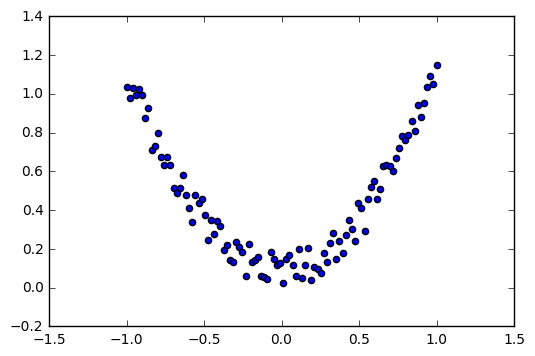

In [5]:
plt.scatter(x.numpy(), y.numpy())

In [6]:
X = Variable(x, requires_grad=True)
Y = Variable(y)

In [39]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden1, n_output):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden1)   # hidden layer
        self.output = torch.nn.Linear(n_hidden1, n_output)

    def forward(self, x):
        x = F.sigmoid(self.hidden1(x))
        x = self.output(x)             # linear output
        return x

In [41]:
net = Net(n_feature=1, n_hidden1=10, n_output=1)     # define the network
print(net)  # net architecture

Net (
  (hidden1): Linear (1 -> 10)
  (output): Linear (10 -> 1)
)


In [42]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss() 

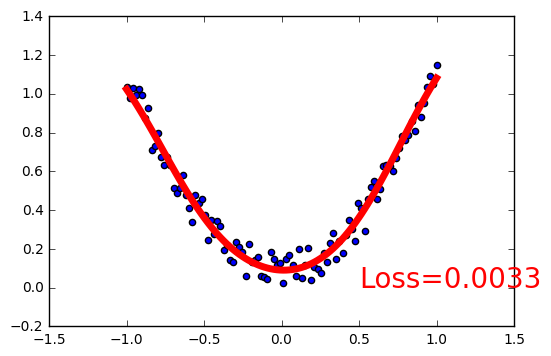

In [104]:
for t in range(2):
    prediction = net(X)     # input x and predict based on x

    loss = loss_func(prediction, Y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 1 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(X.data.numpy(), Y.data.numpy())
        plt.plot(X.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
